# Table of Contents <a id="0"></a>
### 1 [Data preprocessing/ Предобработка данных](#1)
### 2 [Descriptive analysis/ Дескриптивный (описательный) анализ](#2)
### 3.1 [Диагностический (разведочный) анализ ***(графики)***](#3.1)
### 3.2 [Диагностический (разведочный) анализ ***(распределения)***](#3.2)
###   &emsp;  Описательные статистики; scipy.stats
### 4 [Индуктивный анализ](#4)
###   &emsp;  P-value; A/B; T-тест Стьюдента
### 5.1 [Предиктивный анализ](#5.1)
###   &emsp; задачи регрессии и классификации

# [1) Data preprocessing/ Предобработка данных ](#0)<a id="1"></a>

In [68]:
import pandas as np

In [42]:
data1 = pd.DataFrame([[1,'Bob', 'Builder'],
                  [2,'Sally', 'Baker'],
                  [3,'Scott', 'Candle Stick Maker']], 
     columns=['id','name', 'occupation'])

In [43]:
data2 = {
    'Name': ['John', 'Anna', 'Peter', 'Linda', 'James'],
    'Score': [85, 90, 78, 92, 88],
}

example_list = [1, 'Hello', True]

Series = pd.Series(example_list)
df = pd.DataFrame(data)

In [44]:
display(df.info())
display(df.shape)
display(df.dtypes)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Name    5 non-null      object
 1   Score   5 non-null      int64 
dtypes: int64(1), object(1)
memory usage: 212.0+ bytes


None

(5, 2)

Name     object
Score     int64
dtype: object

In [32]:
df2 = pd.DataFrame({'team': ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H'],
                   'points': [18, 22, 19, 14, 14, 11, 20, 28],
                   'assists': [5, 7, 7, 9, 12, 9, 9, 4],
                   'rebounds': [11, 8, 10, 6, 6, 5, 9, 12]})

## Сохраняем исходный датасет

In [ ]:
df_origin = df.copy()

# Five-number summary
## describe(percentiles= [.25, .5, .75], include=['object'],exclude=['object'])

In [ ]:
df.describe(include=['object'],exclude=['object'])

percentiles=[] to calculate no percentiles for each numeric variable in the DataFrame
percentiles= [.25, .5, .75] — процентили для включения в выходные данные, по умолчанию выдаются из списка [.25, .5, .75];
include='all' -по умолчанию численные numpy.number
exclude=None -для исключения всех категориальных типов данных, можно установить этот аргумент в ['O'].

In [65]:
display(df2.describe(include='all',exclude=None)) #все столбцы
#display(df2.describe(exclude=['O'])) - то же самое, что и первая строчка
df2.describe(percentiles=[.3, .6, .9], ) # только численные столбцы, другие перцентили

,team,points,assists,rebounds
count,8,8.000000,8.00000,8.000000
unique,8,NaN,NaN,NaN
top,A,NaN,NaN,NaN
freq,1,NaN,NaN,NaN
mean,NaN,18.250000,7.75000,8.375000
std,NaN,5.365232,2.54951,2.559994
min,NaN,11.000000,4.00000,5.000000
25%,NaN,14.000000,6.50000,6.000000
50%,NaN,18.500000,8.00000,8.500000
75%,NaN,20.500000,9.00000,10.250000


,points,assists,rebounds
count,8.000000,8.00000,8.000000
mean,18.250000,7.75000,8.375000
std,5.365232,2.54951,2.559994
min,11.000000,4.00000,5.000000
30%,14.400000,7.00000,6.200000
50%,18.500000,8.00000,8.500000
60%,19.200000,9.00000,9.200000
90%,23.800000,9.90000,11.300000
max,28.000000,12.00000,12.000000


# Удаление

## None, NaN  .isnull()

In [ ]:
df.isnull()-> True False вместо значений
True будет стоять на месте, где есть пропуск, а в остальных случаях — False.

In [ ]:
df.isnull().sum() - Количество пропущенных значений по столбцам
получится - pandas.Series (колонку), в котором индексы — это названия колонок, а значения — сумма нулевых значений в этих столбцах.

In [ ]:
df.isnull().sum().sum()
>> 178

## .info()
rangeIndex: количество строк;  
data columns: информация о каждом столбце, включая название столбца, количество непустых значений в столбце и тип данных столбца;  
dtypes: информация о типах данных каждого столбца;  
memory usage: объем памяти, занимаемый датафреймом.


У метода pandas.DataFrame.info() есть ограничения: на больших объемах данных он может не выдавать всю интересующую нас информацию. Чтобы скорректировать его работу можно настроить следующие параметры вручную:

1. Установить параметр verbose в значение True. Например, df.info(verbose=True). Это поможет получить  дополнительные сведения о типах данных и количестве уникальных значений в каждом столбце.  

2. Добавить параметр memory_usage='deep'. Например, df.info(memory_usage='deep'). Это поможет оценить реальный объем памяти, занимаемый датафреймом.  

3. использовать метод sample() вместо вызова df.info(). Например, df.sample(n=100).info(). Это поможет получить общее представление о данных без обработки всего датафрейма.  

![111](пропуски_что_делать.png)

## dropna()

![111](dropna.png)

- axis (0 или ‘index’, 1 или ‘columns’, по умолчанию 0) — определяет, будут удаляться строки или столбцы, содержащие пропущенные значения.
- how (‘any’, ‘all’, по умолчанию ‘any’) — определяет условие, при котором строка будет удалена:  
- - any — если в строке/столбце есть хотя бы одно NA-значение; 
- -  all — если строка/столбец полностью состоят из NA-значений. 
- subset (список названий строк или столбцов, необязательное свойство) — подмножество названий строк/столбцов, по которым будет происходить удаление.
- inplace — указывает, нужно ли заменять исходный датафрейм (bool, по умолчанию False).

(1 - df.dropna().shape[0] / df.shape[0]) * 100

3.62

In [ ]:
df.dropna(how='all') # удалим строки, в которых нет данных — только пропуски

# Заполнение пропусков

## .fillna()

_Аргументы **value** или **method** обязательно должен быть заполнен_

![111](fillna.png)

- value (определенное значение в виде строки или числа, словарь, pandas.Series или pandas.DataFrame, по умолчанию None) — значение по умолчанию для заполнения пропуска.
- method (‘backfill’, ‘bfill’, ‘pad’, ‘ffill’, None, по умолчанию None) — метод, используемый для заполнения пропусков:
- - pad/ffill — использует для заполнения пропуска предыдущее значение до пропуска;
- - backfill/bfill — использует для заполнения пропуска следующее после пропуска значения.
- axis — обозначает, по какому направлению будут заполняться пропуски, то есть столбцы (1 или ‘columns’) или строки (0 или ‘index’). По умолчанию (None) заполняет по колонкам.
- inplace — указывает, нужно ли заменять исходный датафрейм (bool, по умолчанию False).

## Заполнение техническим значением (0, -1 или не указано)
Например, в данных есть столбец «пол»: мужскому полу соответствует 0, женскому — 1. В этом случае пропуски можно заменить на -1

In [ ]:
df['region'].fillna('Unknown', inplace=True)
т.е. value = 'Unknown'

## Заполнение пропусков в колонках средним или медианным значением
Для таких выборок необходимо применить робастную (устойчивую) оценку — медиану, на которую не влияют выбросы и неоднородные элементы.

In [ ]:
bmi_mean = df['bmi'].mean() # вызываем метод подсчета среднего
df['bmi'].fillna(bmi_mean, inplace=True) # заменяем исходный датафрейм (столбец df['bmi']) новым

df['age'].fillna(df['age'].median(), inplace=True) # сразу положим медиану, как  value аргумент
df['children'].fillna(df['children'].median(), inplace=True) # аналогично

## Заполнение осмысленным значением на основании других переменных

Типы пропусков в данных и методы их восстановления Согласно классификации Литтла и Рубина1, в данных могут встречаться: 
1) полностью случайные пропуски (missing completely at random (MCAR)); 
2) случайные пропуски (missing at random (MAR)); 
3) неигнорируемые пропуски (non-ignorable missingness).  -наиболее сложный для анализа и восстановления
chrome-extension://efaidnbmnnnibpcajpcglclefindmkaj/  
https://publications.hse.ru/mirror/pubs/share/folder/21tn35z9vl/direct/92272011

С полностью случайными пропусками (MCAR) мы имеем дело тогда, когда пропуски случайно распределены в массиве данных по всем переменным. Наличие MCAR можно проверить статистически t-тестом или хи-квадрат тестом.  
В модуле SPSS Missing Values Analysis (MVA) есть опция Little’s MCAR test, которая на базе статистики хи–квадрат проверяет данные на MCAR. Если в тесте наблюдается незначимый уровень критерия, то мы имеем дело с полностью случайными пропусками данных.  

Случайные пропуски (MAR) данных встречаются тогда, когда пропуски в массиве данных случайно распределены не по всем переменным, а только внутри каких-либо определенных подгрупп переменных. Например, пропуски чаще встречаются среди ответов мужчин, чем ответов женщин, но внутри подгрупп распределены случайны. Такое распределение пропусков в данных случается гораздо чаще, чем MCAR.  

Для борьбы с этими двумя видами пропусков применяют восемь основных классов методов:  
1) анализ полных наблюдений (listwise deletion); 
2) методы, использующие доступную информацию (рairwise deletion);  
*Смысл первого метода заключается в удалении всех респондентов с пропущенными данными (listwise deletion). При вычислении сложных моделей с большим числом переменных этот метод может привести к большому объему исключенных наблюдений, в ряде случаев до двух третей исходного массива данных. Во втором методе переменные для наблюдений с пропущенными значениями не включаются в проводимый анализ по необходимости (рairwise deletion).  
Применение этих способов методически правомерно, если пропуски в данных распределены полностью случайно (MCAR).*
3) подстановка среднего по выборке (mean substitution); 
4) метод хот-дек (hot deck); 
5) регрессионный анализ (regression); 
6) оценка с помощью максимизации правдоподобия (maximum likelihood estimation); 
7) подстановка с помощью факторного анализа (factor analysis substitution); 
8) модель множественного восстановления данных (multiple imputations method).  
_Методы с 3-го по 7-ой используют принцип однократной подстановки восстановленных тем или иным способом данных и могут использоваться, если пропуски распределены случайно (MAR). В основе методов лежит принцип вычисления и подстановки взамен каждого пропущенного значения одного нового значения._

# Удаление выбросов
## .drop()
DataFrame.drop(labels=None, *, axis=0, index=None, columns=None, level=None, inplace=False, errors='raise')

labels : ярлыки, которые нужно удалить. Это могут быть строки или столбцы в зависимости от параметра оси .

ось : определяет, следует ли удалять из строк ( 0 или «индекс» ) или столбцов ( 1 или «столбцы» ).

index : альтернатива указанию axis=0 . Позволяет указать метки строк, которые нужно удалить.

columns : альтернатива указанию axis=1 . Позволяет указать метки столбцов, которые нужно удалить.

inplace : если установлено значение True , операция будет выполнена на месте, что означает, что исходный DataFrame будет изменен. Если значение False (по умолчанию), будет возвращен новый DataFrame с указанными удаленными метками.

ошибки : управляет обработкой отсутствующих меток. Если задано значение «raise» (по умолчанию), будет выдана ошибка, если метки не найдены. Если задано значение «coerce» , отсутствующие метки будут игнорироваться.

In [ ]:
#drop one column by name
df.drop('column_name', axis= 1 , inplace= True )

#drop multiple columns by name
df.drop(['column_name1', 'column_name2'], axis= 1 , inplace= True )

#drop one column by index
df.drop (df.columns [[0]], axis= 1 , inplace= True )

#drop multiple columns by index
df.drop (df.columns[[0,2,5]], axis= 1 , inplace= True )

# Drop row with index 1
df.drop(1, axis=0)

# Dropping first 2 rows by index
df = df.drop([0, 1], axis=0)
df.drop(labels=[0, 1], axis=0, inplace=True)

axis='columns' axis='index' 
errors='raise','coerce'

## .index

In [ ]:
index_of_anomaly = df[df.children == 50].index
# вернет индексы для условия >>[2, 170, 1356]

index_of_age_anomaly = df[df.age == -2].index
df.drop(index_of_age_anomaly, inplace=True)

# Удаление дубликатов
## .dublicated() >>маска True-дибликат False-неповторяющееся 

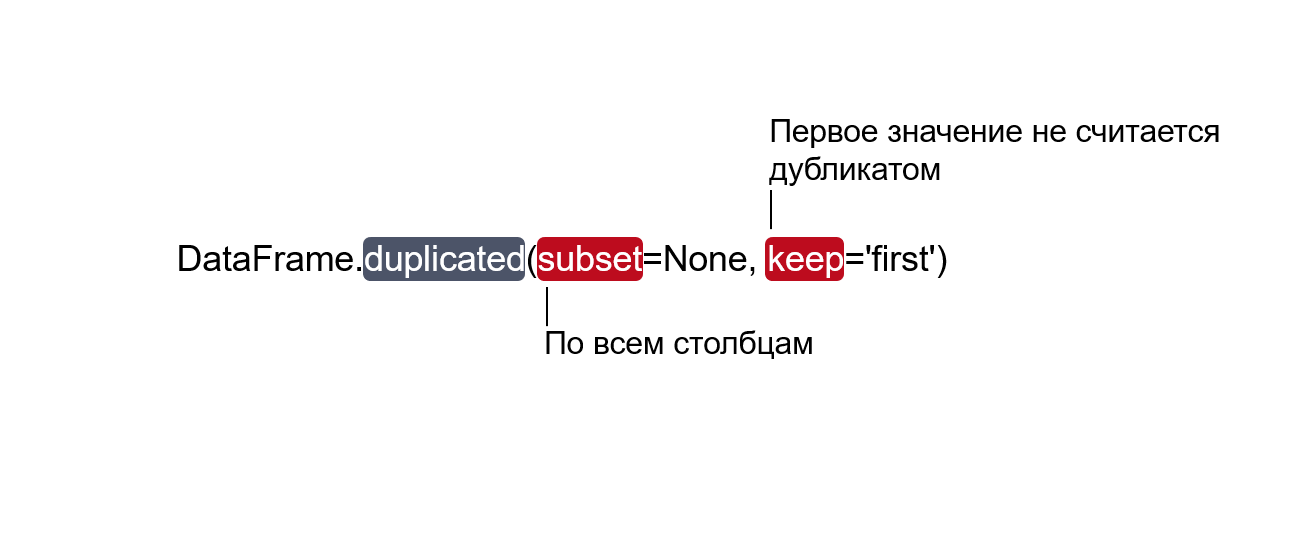

subset (строка или список названий колонок, по умолчанию None) — множество колонок, которые используются для проверки дубликатов. По умолчанию используется для поиска полных дублей, но может самостоятельно определять, по каким колонкам необходимо найти частичные дубликаты.  
keep (значения first, last или False, по умолчанию first) — данное свойство определяет, какая строка будет помечена как дубликат:
- first — помечает дубликатами все повторяющиеся строки, кроме первой;
- last — помечает дубликатами все повторяющиеся строки, кроме последней;
- False — помечает все повторяющиеся строки дубликатами.

In [ ]:
df[df.duplicated()]   получить дублирующиеся строки
df[~df.duplicated()], можно получить датафрейм без полных дубликатов

df.duplicated(subset=['age'])

## .drop_duplicates()

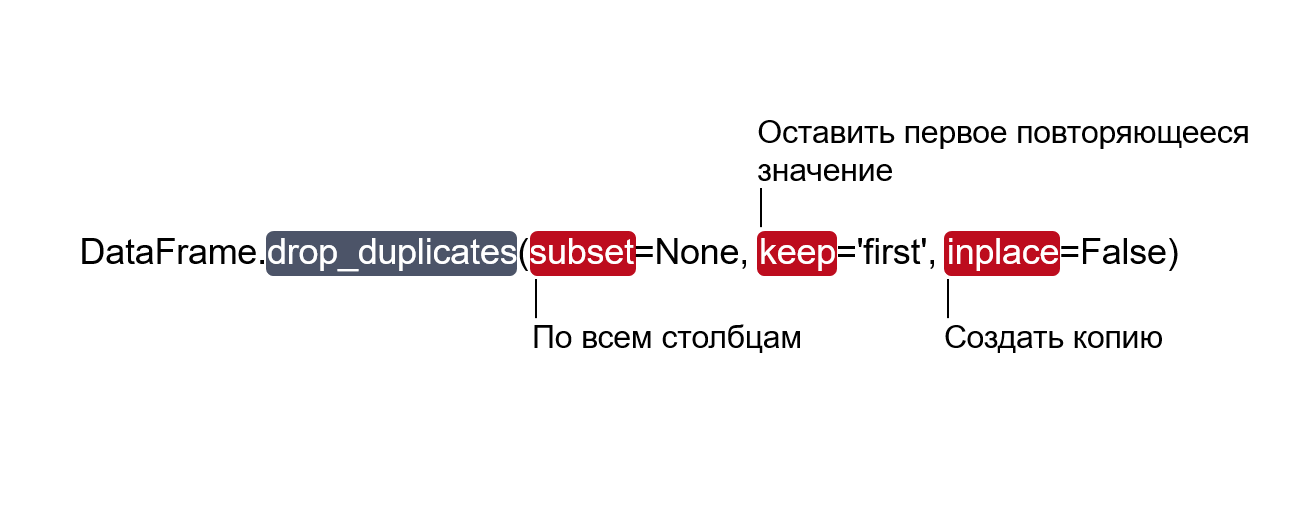

# Преобразование данных

In [ ]:
x = df['charges']
log_x = np.log(x)
df['charges_log'] = df.charges.apply(np.log(x)) # иногда лог на графике информативнее

# Значимость признаков 
Сокращение числа переменных

- Значимость признаков. Как правило, исходная выборка всегда содержит много «мусорных данных»: шумов, выбросов, а на реальный результат влияют лишь несколько переменных.
- Точность решения. Некоторые модели чувствительны к величине входных данных. Например, у нейросетей большое число входных данных может привести к снижению качества итоговой модели.
- Скорость вычислений. Чем меньше переменных, тем быстрее будут идти расчеты.

Обычно для отбора наиболее информативных признаков используется такой показатель, как коэффициент корреляции. Ниже представлена вариация **коэффициента корреляции Пирсона**:

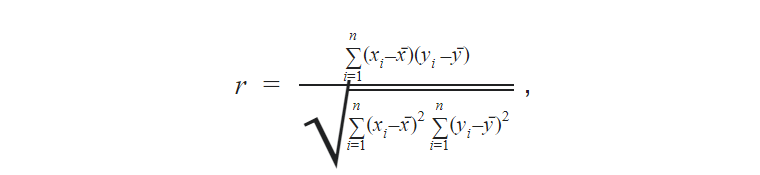

r — значение коэффициента корреляции;  
xᵢ — значение переменной на i-ой позиции;  
yᵢ — значение переменной на i-ой позиции;  
x̅ — среднее значение признака x;  
ӯ — среднее значение признака y.  

## pandas.DataFrame.corr(method = 'pearson') 
дает матрицу пересечений по каждым столбцам со всеми  
method = (pearson, kendall, spearman)

## Feature Engineering  
есть дата или время — полезно добавлять признаки, соответствующие времени дня, количеству прошедшего времени с определенного момента, выделение сезонов, времен года, месяца квартала.  
нам будет легче сравнивать летние и зимние месяцы по объему грузоперевозок, посещаемость магазинов в будние и выходные и другое.  
перевод числового признака в категориальный. Например, нам важно узнать, был перегруз у вагона или нет. При этом в данных хранятся два отдельных столбца «Предельно допустимая масса груза» и «Масса груза в вагоне». Если нам действительно в модели не важна масса груза, мы можем объединить два столбца в один под названием «Есть перегруз?».

## pandas.Series.replace.

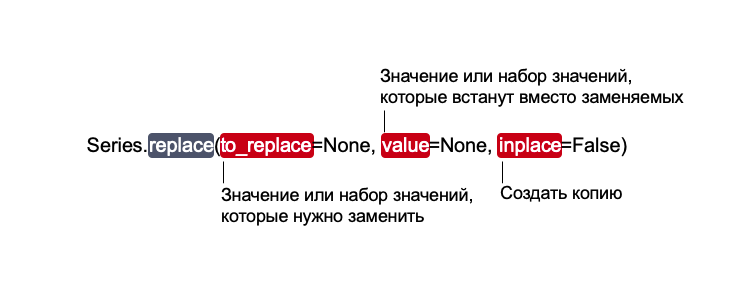

In [ ]:
sex_to_replace = {'male': 0, 'female': 1, 'Unknown': -1}
smoker_to_replace = {'no': 0, 'yes': 1, 'Unknown': -1}

df['sex'] = df['sex'].replace(sex_to_replace)
df['smoker'] = df['smoker'].replace(smoker_to_replace)

## pd.get_dummies(df.region)
В случае переменной 'region' используем метод pandas.get_dummies, который создает набор переменных, каждая из которых принимает только значение 0 и 1.  
Рассмотрим пример: если человек проживает на юго-востоке, то переменной southeast присваивается значение 1, а всем остальным — 0. Если на юго-западе, то southwest = 1, а все остальные переменные равны 0. И так далее.

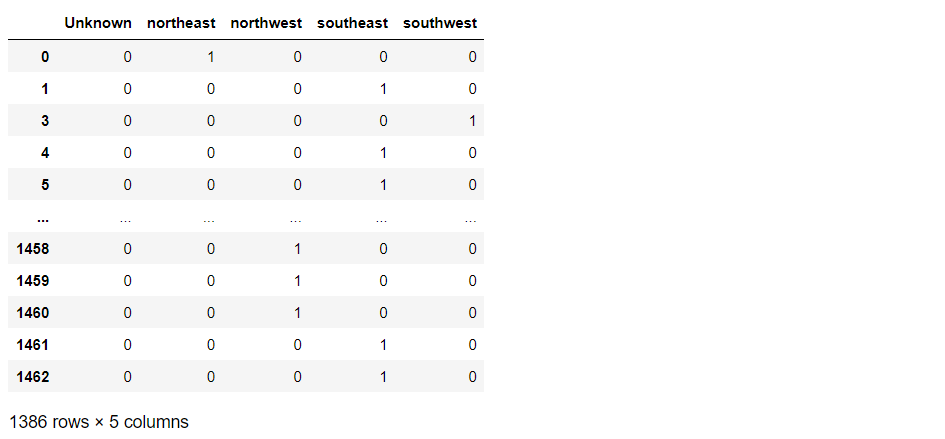

## .concat()
соединим  датасет с датасетом

```python
region_cat = pd.get_dummies(df.region)  
df = pd.concat([df, region_cat], axis = 1)
```

# [2)Descriptive analysis/ Дескриптивный (описательный) анализ](#0)<a id="2"></a>

дескриптивный анализ часто является необходимым элементом для правильного анализа, но при этом почти никогда не является достаточным. Вспомним про квартет Энскомба — четыре набора числовых данных, у которых простые статистические свойства идентичны, но их графики существенно отличаются. Для того чтобы делать выводы о **генеральной совокупности**, нужно иметь репрезентативную выборку и применять более сложные методы, о которых мы поговорим позже.

## Q1 Q2 Q3 >> df.price.quantile(0.25)

In [ ]:
df['Year'], df['Month'], _ = df.Date.str.split('-').str  
#_ используется для того, чтобы день мы никуда не складывали в наш датафрейм

# σ - как далеко в среднем находятся элементы выборки от своего среднего
pandas.Series.std()

## Мода ->две колонки
``` 
pandas.Series.mode()    

0  1.15 #первое значение отвечает за индекс моды, так как у колонки может быть несколько мод 
```

# value_counts()
df.AveragePrice.value_counts().head()
> 1.1 &nbsp; 202  
  1.9 &nbsp; 185  
  2.6 &nbsp; 167  

**Введите "&nbsp" для добавления одного пробела.  
Введите "&ensp" для добавления 2 пробелов.  
Введите "&emsp" для добавления 4 пробелов.**

## коэффициенты асимметрии и эксцесса

Часто коэффициент асимметрии используют при оценке некоторых абсолютных бизнес-показателей — например, NPV (Net Present Value) — финансового показателя, используемого для оценки привлекательности проекта с точки зрения инвестирования.  
При правосторонней асимметрии большие значения NPV являются более вероятными.

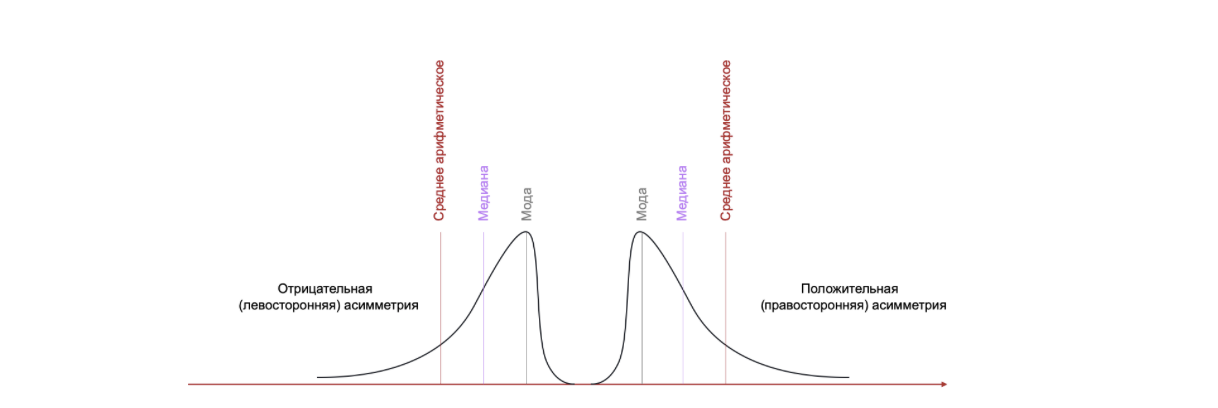

![As_%D0%BA%D0%BE%D1%8D%D1%84%D1%84%D0%B8%D1%86%D0%B8%D0%B5%D0%BD%D1%82%20%D0%B0%D1%81%D0%B8%D0%BC%D0%BC%D0%B5%D1%82%D1%80%D0%B8%D0%B8.png](attachment:As_%D0%BA%D0%BE%D1%8D%D1%84%D1%84%D0%B8%D1%86%D0%B8%D0%B5%D0%BD%D1%82%20%D0%B0%D1%81%D0%B8%D0%BC%D0%BC%D0%B5%D1%82%D1%80%D0%B8%D0%B8.png)
```python
df.AveragePrice.skew()
>> 0.5803 #Мы имеем дело с правосторонней асимметрией, что означает преимущественное появление более высоких цен.
```

![%D0%BA%D0%BE%D1%8D%D1%84%D1%84%D0%B8%D1%86%D0%B8%D0%B5%D0%BD%D1%82%20%D1%8D%D0%BA%D1%81%D1%86%D0%B5%D1%81%D1%81%D0%B0.png](attachment:%D0%BA%D0%BE%D1%8D%D1%84%D1%84%D0%B8%D1%86%D0%B8%D0%B5%D0%BD%D1%82%20%D1%8D%D0%BA%D1%81%D1%86%D0%B5%D1%81%D1%81%D0%B0.png)
```python
df.AveragePrice.kurtosis()
>>0.3252 #В нашем случае, мы имеем более острый пик чем у нормального распределения. Это говорит о преимущественном нахождении цен на авокадо, близких к средним (скоплении значений в центральной зоне).
```

# [3.1)Диагностический (разведочный) анализ ***(графики)***](#0) <a id="3.1"></a>

Грамотная визуализация позволяет без труда составлять верхнеуровневое понимание данных и легко находить зависимости и взаимосвязи.

Научиться визуализировать данные максимально эффективно, рисовать ***тепловые карты*** для ***обозначения корреляции*** между признаками.

# matplotlib_seaborn

# Диаграмма рассеяния (scatter plot)

# [3.2)Диагностический (разведочный) анализ ***(распределения)***](#0) <a id="3.2"></a>

Для многих сложных задач описательной статистики бывает недостаточно, поэтому аналитики данных используют другой тип анализа, который называется диагностический (разведочный) анализ. Он позволяет **заметить тренды** в данных. Обычно на этом этапе: 
- **строят распределение данных;**
- **выявляют зависимости между переменными;**
- **ищут аномалии.**

>**Случайная величина** — это величина, которая в зависимости от обстоятельств принимает то или иное **значение с некоторой вероятностью**.   
>**Распределение случайной величины** — это **правило**, описывающее область значений случайной величины и соответствующие вероятности появления этих значений.

# >> Нормальное распределение

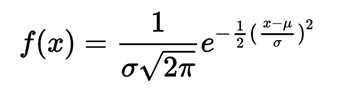

# Описательные статистики 

**Среднее** — совпадает с математическим ожиданием нормального распределения (μ);  
**Медиана** — совпадает со средним значением и находится посередине распределения (как 50-й процентиль);  
**Стандартное отклонение** — около 68% значений находятся в пределах одного стандартного отклонения от среднего, около 95% — в пределах двух и около 99.7% — в пределах трех отклонений;  
**Коэффициент асимметрии** — равен 0, что означает симметрию распределения;  
**Коэффициент эксцесса** — равен 0, что указывает на нормальную островершинную форму.  

In [ ]:
df['Outside_temperature'].mean() >> 10.5
df['Outside_temperature'].median() >> 10.5
df['Outside_temperature'].std() >> 7.210662243656334 -> µ + -σ -> 68%
df['Outside_temperature'].skew() >> 0
df['Outside_temperature'].kurt() >> 0

# >> Логнормальное распределение

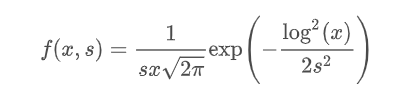

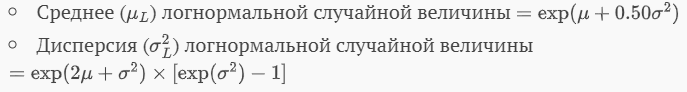

loc и scale — параметры, используемые для сдвига и/или масштабирования распределения;   
 s — логнормальная непрерывная случайная величина, вхоядщая в функцию плотности вероятности для логонормального распределения:  

В реальных бизнес-задачах логнормальное распределение используется для моделирования таких показателей, которые не могут быть отрицательными: например, выручки, количества посетителей магазина в день или количества километров, пройденных курьерами.

Также данное распределение используется для моделирования вероятностей цен на акции и другие активы. Например, активно применяется в модели ценообразования опционов Блэка-Шоулза-Мертона.

# >> Распределе́ние Берну́лли 

## Теорема Пуассона — теорема в теории вероятностей.

# >> Биномиальное распределение вероятностей
Биномиальным называют распределение количества «успехов» в последовательности из n
 независимых случайных экспериментов, таких, что вероятность «успеха» в каждом из них постоянна и равна p.  
X=k - количество испытаний, в которых появилось событие, имеет биномиальное распределение вероятностей.

## Независимые испытания. Формула Бернулли
вероятность того, что событие А появится в этих n испытаниях ровно k раз, выражается формулой Бернулли
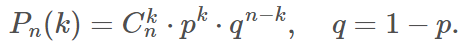
Такой ***эксперимент*** еще называется ***схемой повторных независимых испытаний*** или ***схемой Бернулли***.  
Распределение числа успехов (появлений события) носит название биномиального распределения  
**M(X)=np, D(X)=npq, σ(X)=√npq**

**В финансовом моделировании биномиальное распределение используется как простая аппроксимация для моделирования величин, имеющих невысокое влияние на итоговую переменную.**

In [ ]:
from math import factorial
def binomial_distribution(n, k, p):
        return (factorial(n) / (factorial(k) * factorial(n-k)))*(p**k)*((1-p)**(n-k))
    
binomial_distribution(7,1,0.3) >> 0.05500477215183466

# >> Распределение Пуассона

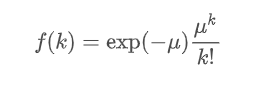

Распределение дискретного типа случайной величины, представляющей собой число событий, произошедших за фиксированное время, при условии, что данные события происходят с некоторой фиксированной средней интенсивностью и независимо друг от друга.
Распределение Пуассона играет ключевую роль в теории массового обслуживания.

Среднее — равно параметру λ (обозначили µ), который также является средним значением и дисперсией распределения;  
Медиана — почти равна математическому ожиданию µ (median ~ µ + 0.3 - 0.02 * µ)
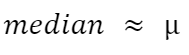  

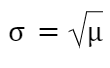

Коэффициент асимметрии: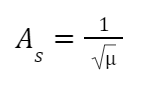

Коэффициент эксцесса: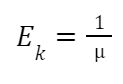

In [ ]:
Stockholm_df['Average_Visitors'].mean() >> 50.0 =λ
Stockholm_df['Average_Visitors'].median() >> 50.0= λ или λ-1/λ, если λ четное
Stockholm_df['Average_Visitors'].std() >> 7.04692263251554   =sqrt(λ)
Stockholm_df['Average_Visitors'].skew() >> 0.12207067151893013 =1/sqrt(λ)
Stockholm_df['Average_Visitors'].kurt() >> 0.0007846880971427161 = 1/λ

# >> scipy.stats

## >>> norm

In [76]:
from scipy.stats import norm

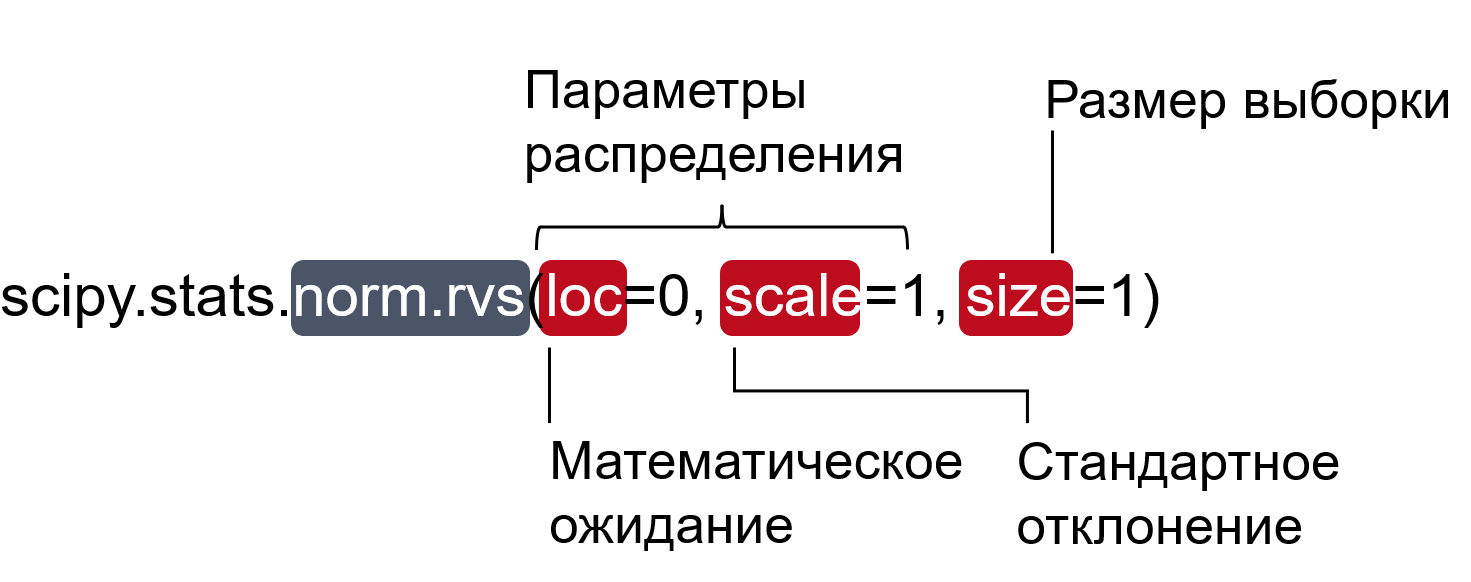

In [78]:
norm.rvs(loc=0,scale=1,size=10)

array([ 0.39584851, -0.74599618, -0.44053166, -0.46025009, -1.47356194,
       -2.16791481, -2.00852102,  0.84250492,  0.31628618,  1.09908922])

**Random Value Sample** Указать три агрумента: математическое ожидание, стандартное отклонение и размер выборки, которую необходимо сгенерировать norm.rvs(13, 5, size=n)

## >>>lognorm

In [ ]:
from scipy.stats import lognorm

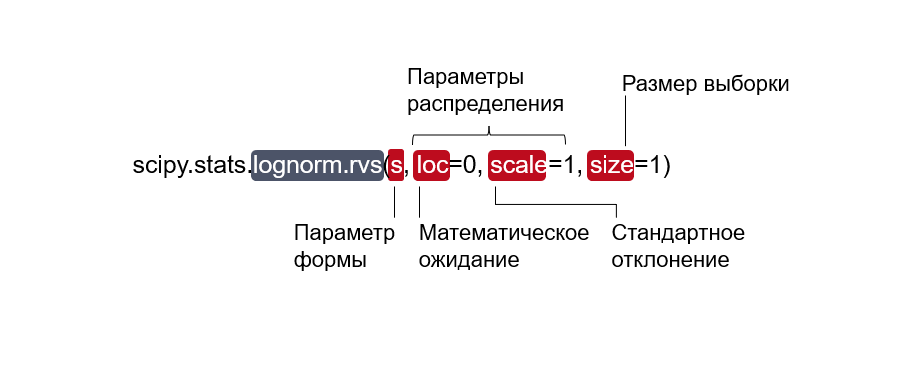

Указать четыре аргумента: параметр s, математическое ожидание, стандартное отклонение и размер выборки, которую необходимо сгенерировать lognorm.rvs(s=0.65, loc=1000, scale=5000, size=n)

loc и scale — параметры, используемые для сдвига и/или масштабирования распределения;  
 s — логнормальная непрерывная случайная величина, вхоядщая в функцию плотности вероятности для логонормального распределения:

## >>> poisson

In [82]:
from scipy.stats import poisson

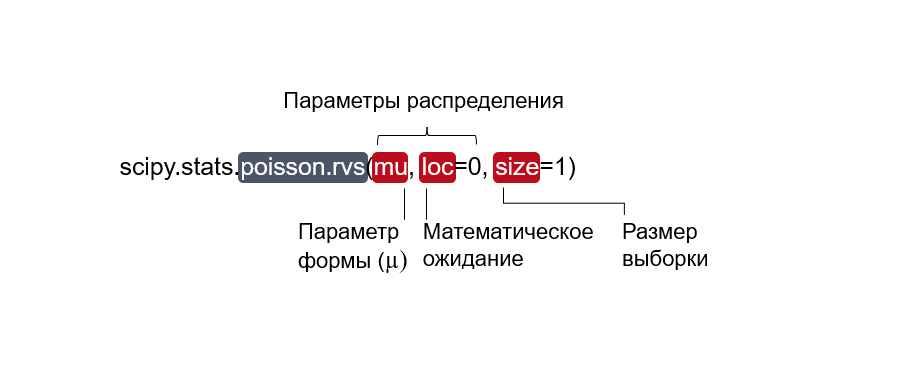

In [103]:
poisson.rvs(2,1,10,random_state=None)

array([7, 2, 2, 2, 3, 4, 2, 3, 2, 1], dtype=int64)

Указать три аргумента: параметр мю, мат.ожидание и размер выборки, которую необходимо сгенерировать, и выбрать, нужна ли вам уникальная выборка.  

Аргумент **random_state**, в который необходимо указать любое целое число. Если указать None или не указывать ничего, при каждом запуске будет генерироваться уникальное распределение.

## >>> binomial

In [ ]:
from numpy.random import binomial

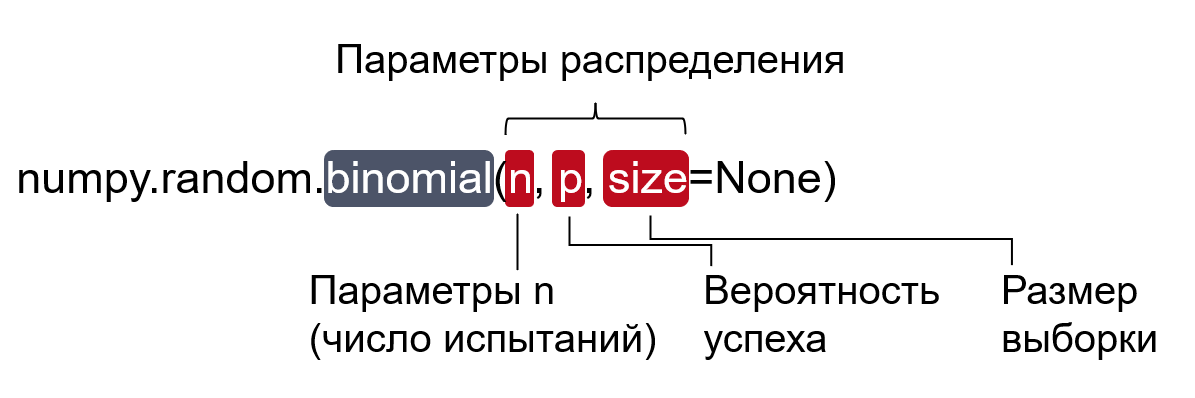

Указать три аргумента: параметр n, вероятность события p и размер выборки
binomial(n, p, size=None)

# Монте-Карло
## (прогнозирования диапазона потенциальных значений)
[Моделирование Монте-Карло с помощью Python](https://colab.research.google.com/github/dm-fedorov/pandas_basic/blob/master/%D0%B1%D1%8B%D1%81%D1%82%D1%80%D0%BE%D0%B5%20%D0%B2%D0%B2%D0%B5%D0%B4%D0%B5%D0%BD%D0%B8%D0%B5%20%D0%B2%20pandas/%D0%9C%D0%BE%D0%B4%D0%B5%D0%BB%D0%B8%D1%80%D0%BE%D0%B2%D0%B0%D0%BD%D0%B8%D0%B5%20%D0%9C%D0%BE%D0%BD%D1%82%D0%B5-%D0%9A%D0%B0%D1%80%D0%BB%D0%BE%20%D1%81%20%D0%BF%D0%BE%D0%BC%D0%BE%D1%89%D1%8C%D1%8E%20Python.ipynb#scrollTo=oP785plb0rkq)

# [4) Индуктивный анализ](#0)<a id="4"></a>
Ранее вы познакомились с описательным и разведывательным методами анализа данных. Эти методы позволяют описать данные, сделать на их основе выводы или предположить гипотезы. В этом уроке познакомимся с ещё одним методом — индуктивным анализом. Индуктивный анализ позволяет на основе небольшой выборки сделать обобщающие выводы обо всем множестве значений.

### ***Репрезентативность***
***Удобная выборка*** - аналитики собирают ее из тех данных, которые оказались под рукой.  
***Систематическая ошибка выжившего***

**Выборочное среднее  
Стандартная ошибка — это мера точности оценки среднего, которая показывает, насколько мы можем быть уверены в том, что среднее значение действительно близко к истинному. Стандартная ошибка вычисляется так:**

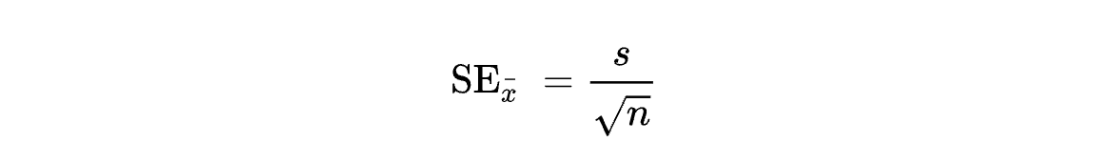
s — это стандартное отклонение случайной величины на основе несмещённой оценки её выборочной дисперсии, n — число наблюдений в выборке.
[Несмещённая оценка](https://ru.wikipedia.org/wiki/%D0%9D%D0%B5%D1%81%D0%BC%D0%B5%D1%89%D1%91%D0%BD%D0%BD%D0%B0%D1%8F_%D0%BE%D1%86%D0%B5%D0%BD%D0%BA%D0%B0)  
[Выборочная дисперсия](https://ru.wikipedia.org/wiki/%D0%92%D1%8B%D0%B1%D0%BE%D1%80%D0%BE%D1%87%D0%BD%D0%B0%D1%8F_%D0%B4%D0%B8%D1%81%D0%BF%D0%B5%D1%80%D1%81%D0%B8%D1%8F)

**Доверительный интервал** ***(confidence interval)*** — это диапазон, в котором с некоторой вероятностью находится параметр, в нашем случае — среднее из генеральной совокупности.  
95-процентный доверительный интервал строится по формуле   
[x - 1.96se; x + 1.96se]  
То есть с вероятностью 95% оценка приложения лежит в интервале от 5.1 до 6.2.  
[x - 2.58se; x + 2.58se]

In [ ]:
x = df['score'].mean() # Найдем среднее
sd = df['score'].std() # Найдем стандартное отклонение выборки
se = sd / np.sqrt(len(df['score'])) # Вычислим стандартную ошибку
print(x-1.96*se, x+1.96*se)

>>5.098875126434466
>>6.201124873565535

#### То есть с вероятностью 95% оценка приложения лежит в интервале от 5.1 до 6.2.

In [ ]:
# Сравним длину старого и нового интервала
print((x+1.96*se) - (x-1.96*se))
print((x_new+1.96*se_new)-(x_new-1.96*se_new))

1.1022497471310686
0.7106750790917769

#### С увеличением выборки интервал заметно сузился.

когда мы счетаем выборочное стандартное отклонение, мы получаем наименьшее значение для суммы квадратов разностей(отнимаем выборочное среднее[это минимум функции для выборочных значений]), а реальное отклонение больше -> числитель меньше, чем нужно для генеральной совокупности, нужно занизить знаменатель до n-1

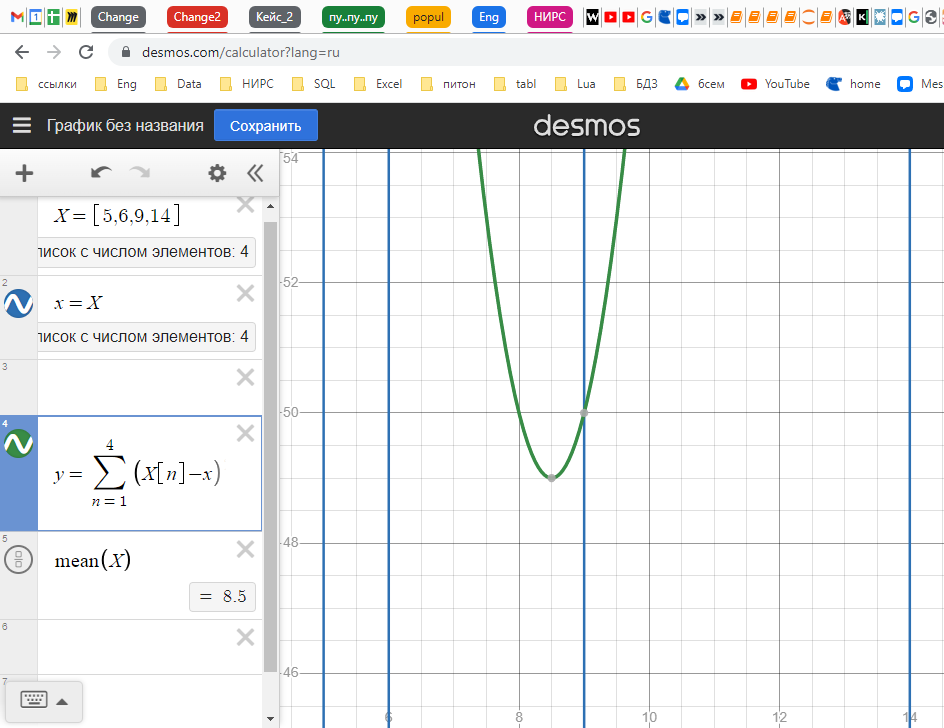

## P-value 

**Вероятность получить такие же или более отличные результаты случайно.**

это вероятность, с которой мы можем отклониться на такое или еще более экстремальное значение в рамках нашего распределения. 

P-value показывает, насколько вероятно такое распределение данных, которое мы видим в выборке, при условии, что нулевая гипотеза верна. Если p-value меньше заданного уровня значимости альфа, мы можем отвергнуть H0.

p-value — вероятность получить такую или **еще большую оценку случайно**. При p_value меньше, чем уровень значимости α, мы можем отклонить нулевую гипотезу.

![](fcd3c734-8717-11ee-8d96-328ecddd89df.png)

In [ ]:
p_value = round(1 - norm.cdf(sample_score, score, se), 3)
print('Вероятность получить такую или еще большую оценку: ', p_value)

#Вероятность получить такую или еще большую оценку: 0.027

В результате расчетов мы получили значение 0.027 или 2.7%. Это значит, что именно с этой вероятностью мы получим такую или ещё большую оценку от пользователей при истинности нулевой гипотезы. Полученная вероятность p_value — это ***статистическая значимость*** нашего результата, то есть степень уверенности в том, что результат не был получен случайно.  
Как видим, вероятность достаточно мала, поэтому отклоняем нулевую гипотезу и принимаем, что обновление нашего приложение действительно понравилось пользователям.

alpha = 0.05
p_value = round(1 - norm.cdf(sample_score, score, se), 3)

if p_value < alpha:
    print('Отклоняем нулевую гипотезу')
else:
    print('Не можем отклонить нулевую гипотезу')

Отклоняем нулевую гипотезу

На этом примере мы провели одностороннюю проверку гипотезы. Мы посчитали, что обновление версии не могло испортить оценку. 

## Односторонняя и двусторонняя проверка гипотез
А что если мы ошиблись, и на самом деле новый дизайн расписания не понравился нашим пользователям вовсе? Если до проведения эксперимента мы можем допустить, что различие сравниваемых параметров (в нашем случае — оценок пользователей) может быть как положительным, так и отрицательным, стоит использовать двустороннюю гипотезу.  

H1 — Новая версия изменила оценку от пользователей  

Посчитаем, какова вероятность отклониться на такую величину, но теперь в обе стороны — и в меньшую и в большую стороны, то есть проведем двустороннюю проверку гипотезы. Нам важно узнать, какая площадь лежит под графиком, при условии X < 5 или X > 6.

![111](2222.png)

P-value — вероятность получить такое или еще более сильное отклонение случайно. Значение α при этом не меняется: 0.05.

In [ ]:
alpha = 0.05
p_value = round(1 - norm.cdf(sample_score, score, se), 3) * 2

if p_value < alpha:
    print('Отклоняем нулевую гипотезу')
else:
    print('Не можем отклонить нулевую гипотезу')

Не можем отклонить нулевую гипотезу

# А/B-тестирование (тип статистического текста)

А/В-тестирование — это испытание двух версий одного и того же продукта или сервиса с целью выяснить, какая из них работает лучше. Например, вы можете провести A/B-тест двух разных моделей реализации продуктов в гипермаркете, чтобы увидеть, какой из них приносит бОльшую прибыль.

При проведении А/В-теста выборки берутся из одной генеральной совокупности, ***каждая группа независима и видит свой вариант продукта***;
- А — Контрольная группа — группа пользователей, для которой не вводят никаких изменений. В нашем примере — это магазин в Стокгольме.
- Б — Тестовая группа — группа пользователей, для которой внедряют тестовые изменения. В нашем примере — это магазин в Гётенберге.

Как правило, группы делятся поровну — 50/50, но допустимы случаи, когда группы оказываются разных размеров.  
По итогам A/Б-теста сравнивают ***целевые метрики*** между контрольной(A) и тестовой(Б) группой. **Если в тестовой группе метрика статистически значимо выше, то мы можем беспрепятственно раскатить изменения на всех пользователей.** Если же метрика в тестовой группе упала, то такой тест считают «запрещающим».

In [ ]:
import numpy as np

a = np.array([100, 150, 120, 100, 150]) # Контрольная группа
b = np.array([10, 30, 60, 60, 1000]) # Тестовая группа

print(f'Среднее контрольной группы {a.mean()}')
print(f'Среднее тестовой группы {b.mean()}')

Среднее контрольной группы 124.0
Среднее тестовой группы 232.0

**Целевая** — метрика, которая фигурирует в проверяемой гипотезе.   
Например: ***CR(Конверсия в заявку), ARPU(Средний доход на пользователя), Retention Rate(Коэффициент удержания)*** и другие.

**Прокси-метрика** — метрика, поведение которой косвенно связано с целевой. Как правило, для целевой метрики есть набор прокси-метрик.   
Например, среднее время сессии(Время между заходом и уходом с сайта\приложения) и глубина просмотра страницы(Сколько страниц подряд просматривает пользователь) могут быть прокси-метриками для конверсии в заказ.

***Барьерная или Guardrail-метрика*** - третий тип метрики, за которой мы следим, но не используем в исследовании . Это та метрика, которая не должна падать в процессе эксперимента. Например, показатели маржинальности.

Целевые, прокси- и Guardrail-метрики используются в A/B-тестировании для **оценки эффективности изменений** в продукте или процессе.

Если смотреть только на средние, то чек в тестовой группе оказался выше, почти на 100 у.е.  
Но если посмотреть на саму выборку, то станет ясно, что все дело в аномально высокое значении 1000 у.е., которое сильно влияет на результат.   
Этот пример наглядно показывает просто сравнивать средние может быть опасно. **Различие между группами должно быть статистически значимым.**

- A/B/n-тестировани  

Это вид тестирования похож на А/В, но имеет несколько вариантов.    
Представьте, что мы работали бы с данными о продажах не в двух, а в трех магазинах, в одном из которых организовали систему быстрого питания, а в другом — зоны отдыха для покупателей с возможностью подзарядки мобильных устройств и доступом к Wi-Fi. В этом случае нам необходимо было бы проверить гипотезу, состоящую из нескольких тестовых вариантов, поэтому мы бы работали с одной контрольной группой и двумя тестовыми.

- A/A-тестирование

Этот вид тестирования похож на А/В, но используется перед его началом, чтобы проверить валидность планируемого эксперимента.  
Представьте, что нам нужно было бы провести стандартный А/В-тест, но предварительно убедиться, что группы, выбранные для тестирования, одинаковы. В этом случае в эксперименте бы участвовали две контрольные группы из разных магазинов до нововведений. Если изменение покупательского опыта единственное, что влияет на разницу целевой метрики при А/В-тестировании, то в А/А-тесте мы не увидели бы никаких статистически значимых изменений — продажи были бы одинаковыми. Если метрика отличалась бы, это значило бы, что что-то пошло не так и результаты АБ-тестирования будут неверными.


## Когда не нужно проводить A/В-тест?
- ***Конкретный измеряемый эффект*** Гипотеза сформулирована некорректно: от гипотезы ожидается конкретное изменение и ожидаемый измеримый эффект.
- ***Размер выборки*** Слишком маленький охват пользователей: по маленьким выборкам тяжело делать выводы об общем восприятии продукта.
- ***Малый вклад в изменение целевой метрики***: если целевые показатели напрямую не зависят от элемента, который вы хотите протестировать, то A/Б-тестирование будет не эффективно.
- ***Тестирование очевидных улучшений***: если изменения элементов сайта или приложения кажутся очевидными и не требуют дополнительного исследования для подтверждения, то проведение теста будет излишним.

# Метрики, которые помогают оценить ***эффективность изменений*** в продукте или процессе

## Все метрики A/Б-тестов можно поделить на 3 группы:

**Целевая** — метрика, которая фигурирует в проверяемой гипотезе.   
Например: ***CR(Конверсия в заявку), ARPU(Средний доход на пользователя), Retention Rate(Коэффициент удержания)*** и другие.

**Прокси-метрика** — метрика, поведение которой косвенно связано с целевой. Как правило, для целевой метрики есть набор прокси-метрик.   
Например, среднее время сессии(Время между заходом и уходом с сайта\приложения) и глубина просмотра страницы(Сколько страниц подряд просматривает пользователь) могут быть прокси-метриками для конверсии в заказ.

***Барьерная или Guardrail-метрика*** - третий тип метрики, за которой мы следим, но не используем в исследовании . Это та метрика, которая не должна падать в процессе эксперимента. Например, показатели маржинальности.

Целевые, прокси- и Guardrail-метрики используются в A/B-тестировании для **оценки эффективности изменений** в продукте или процессе.

## Статистические критерии для проверки гипотез

 в А/В-тестировании используются также метрики, которые позволяют провести сам анализ данных и выявить определенные закономерности. Они помогают понять, как распределены данные, какие значения встречаются чаще всего, и как они соотносятся друг с другом.

- **Метрика-среднее** — метрика, значение которой рассчитывается как среднее значение величины по клиентам.    
-Например, Количество заказов; ARPU (Средний доход с пользователя).
- ***Метрика-отношение** — метрика, значение которой нельзя рассчитать как среднее по клиентам, но можно представить в виде отношения. Этот тип метрики характеризует всю группу сразу и показывает во сколько раз одно значение больше или меньше другого.  
-Например, Конверсия = Количество заходов / Количество просмотров. Другие примеры метрики-отношения: Средняя длина сессии, Конверсия в заказ, Средний чек (нельзя посчитать средний чек на одного пользователя, но можно для группы пользователей).
- **Метрика-квантиль** — метрика, значение которой рассчитывается как квантиль распределения какой-то величины. Она показывает, какое значение отделяет верхнюю часть выборки от нижней. Обычно квантили используются, когда имеются большие выбросы.   
-Например, Медианный чек, 0.75-квантиль для скорости загрузки сайта и тому подобное.

Описанный ранее способ проверки гипотез дает понимание идеи **статистической значимости**, но сам способ не универсальный. Для каждого типа метрик подходят свои статистические критерии проверки. Мы обсудим несколько основных критериев. А также обозначим для какого типа метрик какой критерий лучше подходит.

# T-тест Стьюдента
T-тест Стьюдента используется, чтобы определить, отличаются ли средние значения двух выборок и есть ли между двумя группами данных значимые различия.

Под этот критерий отлично подходит метрика-среднее.  
Т-тест или t-критерий требует нормальности распределения выборочных средних и схожесть дисперсий между группам. Нормальность распределения не является проблемой при достаточно больших выборках, так как работает Центральная Предельная Теорема (ЦПТ). Критерий чувствителен к выбросам (аномальным значениям), потому перед использованием теста необходимо провести предобработку данных — почистить от выбросов.

H0 — Продажи между магазинами одинаковые  
H1 — Продажи в Гётеборге изменились после нововведений  
Если бы мы много раз составляли выборки A и B, то разности их средних распределились бы нормально вокруг 0. А стандартная ошибка вычислялась бы по формуле:

Если верна нулевая гипотеза, то среднее ГС для группы А должно быть равно среднему ГС для группы Б. Запишем так: A_general - B_general = 0.

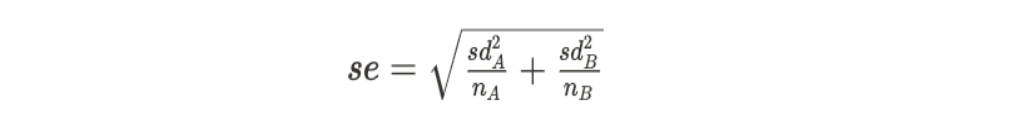
sda — стандартное отклонение группы А,   
na — количество наблюдений в группе А,  
sdb — стандартное отклонение группы В,    
nb — количество наблюдений в группе Б.  

Зная среднее ГС и стандартную ошибку, мы точно также можем определить вероятность получить разницу в 737 у.е. или больше, как в примере ранее.  
Но в отличие от того, что мы делали ранее, здесь мы будем использовать не нормальное распределение, а распределение t-Стьюдента. Визуально оно очень похоже на нормальное, но **лучше описывает выборки с реальными данными. Визуальное различие заключается в том, что хвосты распределения более длинные, оно более устойчиво к разбросу значений. При этом чем больше выборка, тем больше распределение похоже на нормальное.**

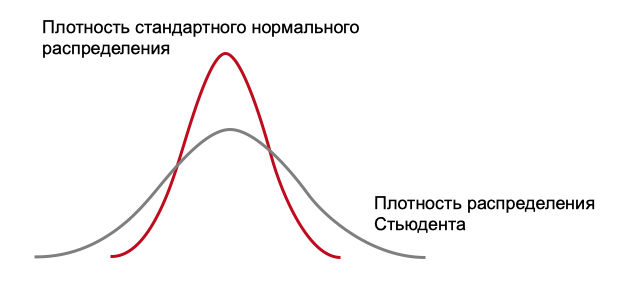

# ttest_ind()
На вход передадим выборки A и B, а также то, что мы проверяем двустороннюю гипотезу, так как мы не знаем заранее, улучшились или ухудшились продажи. 

In [ ]:
from scipy.stats import ttest_ind

alpha = 0.05 # Пороговый уровень значимости
s, p_value = ttest_ind(df_a['Daily_Profit'], df_b['Daily_Profit'], alternative='two-sided') # s — значение t-статистики, p_value — искомая вероятность

if p_value < alpha:
   print('Отвергаем нулевую гипотезу. Продажи в Гётеборге изменились')
else:
    print('Не можем отвергнуть нулевую гипотезу')

Не можем отвергнуть нулевую гипотезу

# Критерий Манна-Уитни
- Критерий Манна-Уитни используется для сравнения двух независимых выборок по уровню какого-либо признака.
- Критерий Манна-Уитни не требует нормальности распределения данных и может быть применен на выборках, в которых менее 30 элементов.

Ранг — это порядковый номер элемента если выборку отсортировать.

# mannwhitneyu()
Он основан на методе «один против всех», в котором каждый класс рассматривается как отдельный и строится модель, предсказывающая принадлежность объекта к этому классу. Затем результаты моделей объединяются в один общий результат.

In [ ]:
from scipy.stats import mannwhitneyu

alpha = 0.05
s, p_value = mannwhitneyu(df_a['Daily_Profit'], df_b['Daily_Profit'], alternative='two-sided')

if p_value < alpha:
    print('Отвергаем нулевую гипотезу. Продажи в Гётенберге изменились')
else:
    print('Не можем отвергнуть нулевую гипотезу')

Не можем отвергнуть нулевую гипотезу

# Z-тест для пропорций

Z-тест подходит используется для сравнения пропорции, например для определения доли мужчин в общей численности населения страны или конверсии в покупку от общего числа посетителей. Это метрика-отношение. Например в случае конверсии мы можем оперировать распределением из 0 и 1, где 0 — это посещение магазина без перехода, а 1 — с покупкой. И только сложив количество заходов и поделив на количество просмотров, мы получим какое-то значение конверсии.

В нашем случае это эффективность магазина (Daily_profit_diff), которая выражена значениями -1, если день неприбыльный и 1 — если прибыльный. Чтобы вычислить общую долю прибыльных дней необходимо посчитать среднее.  
```python
A_mean = df_a['Daily_profit_diff'].mean()  
B_mean = df_b['Daily_profit_diff'].mean()
print(A_mean, B_mean)

-0.008210526315789474 0.010947368421052631
```
Как же проверить статическую значимость в этом случае? Здесь нам поможет Z-критерий для пропорций.
Сформулируем гипотезы:  
H0 — Эффективность магазинов не отличается  
H1 — Эффективность магазинов разная  

# proportions_ztest() из пакета statsmodels

Эта функция принимает два аргумента: пропорцию в первой выборке и пропорцию во второй и возвращает значение z-статистики и p-value, которое показывает вероятность получения такого значения z-статистики при условии, что нулевая гипотеза верна.

Прежде, чем использовать proportions_ztest(), необходимо определить количество «успехов»  и общее количество наблюдений. В нашем случае «успех» — это значение 1.

In [ ]:
from statsmodels.stats.proportion import proportions_ztest

alpha = 0.05 # Уровень значимости

success_a = df_a.query('Daily_profit_diff == 1')['Daily_profit_diff'].count()
trial_a = df_a['Daily_profit_diff'].count() # Посчитаем количество прибыльных дней в группе А

success_b = df_b.query('Daily_profit_diff == 1')['Daily_profit_diff'].count()
trial_b = df_b['Daily_profit_diff'].count() # Количество прибыльных дней в группе B

s, p_value = proportions_ztest(count=[success_a, success_b], nobs=[trial_a, trial_b]) # s - z-статистика, p_value - искомая вероятность

if p_value < alpha:
    print('Отвергаем нулевую гипотезу. Продажи в Гётеборге изменились')
else:
    print('Не можем отвергнуть нулевую гипотезу')

Не можем отвергнуть нулевую гипотезу

# [5.1) Предиктивный анализ](#0)<a id="5.1"></a>
Прогнозы 

# библиотека scikit-learn, «‎sklearn»   (SciPy Toolkit)
Она предоставляет множество инструментов и алгоритмов для задач классификации, регрессии и многих других задач машинного обучения и статистического анализа данных.  
- Простота использования  
Scikit-learn предоставляет простой и интуитивно понятный интерфейс для работы с алгоритмами машинного обучения. Это делает его идеальным выбором для начинающих и опытных аналитиков данных.
- Большое сообщество и поддержка  
Scikit-learn имеет активное сообщество пользователей и разработчиков, что означает, что можно легко найти помощь и ресурсы в Интернете, если у вас возникают вопросы или проблемы.
- Богатый выбор алгоритмов  
Библиотека содержит множество алгоритмов машинного обучения и методов анализа данных, позволяя выбирать наиболее подходящие методы для конкретной задачи.
- Интеграция с другими библиотеками  
Scikit-learn хорошо интегрируется с другими популярными библиотеками для анализа данных, такими как **NumPy, Pandas и Matplotlib**, что упрощает анализ и визуализацию данных.
- Открытый исходный код  
Scikit-learn является проектом с открытым исходным кодом, что позволяет пользователям адаптировать его под свои нужды и внедрять в собственные проекты без ограничений.  


альтернативы
- TensorFlow и PyTorch  
Эти библиотеки предоставляют более широкий набор инструментов для создания и обучения глубоких моделей.
- XGBoost и LightGBM  
Эти библиотеки специализируются на градиентном бустинге (техника машинного обучения для задач классификации и регрессии, которая строит модель предсказания в форме комбинации слабых предсказывающих моделей, обычно деревьев решений) и обладают большой производительностью в задачах классификации и регрессии.

In [ ]:
pip install -U scikit-learn

Импортируем **класс реализации линейной регрессии** из библиотеки scikit-learn и **создадим модель линейной регрессии**, которую мы будем использовать **для обучения и прогнозирования**

In [ ]:
import pandas as pd 
import numpy as np

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

model = LinearRegression()
df=pd.read_csv('Lesson_4_insurance.csv')

In [ ]:
#Затем определим независимые и зависимые переменные (X и Y):
X = df[["Average_Visitors", "Average_Order_Value", "Humidity", "Workers"]]
Y = df["Daily_Profit"]

In [ ]:
##Определим количество столбцов и строк в Х:
X.shape
--> (19000, 4)

Далее нам необходимо разделить данные на обучающую и тестовую выборки.  
Обычно это делают в пропорции  70/30, 75/25  или 80/20. 

Для оценки качества модели есть и более продвинутый способ — **кросс-валидация**. При его использовании мы разделяем данные несколько раз и каждый раз берем разные части данных для обучения и проверки, а полученные результаты усредняем.  
Таким образом, разница между жестким разделением на тестовую и обучающую выборки и кросс-валидацией заключается в том, что кросс-валидация выполняет множество тестов на разных наборах данных. Кросс-валидация более надежна, но требует больше времени и вычислительных ресурсов.

In [ ]:
#В нашей задаче мы ограничимся стандартным делением выборки на обучающую и тестовую в пропорции 70/30.
test_split_index = int(X.shape[0]*0.7)
X_train = X[:test_split_index]
X_test = X[test_split_index:]
Y_train = Y[:test_split_index]
Y_test = Y[test_split_index:]

In [ ]:
#Обучим модель с использованием метода fit():
model.fit(X_train, Y_train)
#Рассчитаем Y для тестовой выборки:
Y_predicted = model.predict(X_test)
print(Y_predicted)

In [ ]:
В результате у нас получается массив с предсказанными значениями Y:
[43587.08281938  64814.43197401  39219.26744681 ...  20968.01390973
66198.96127899 156276.92434464]

Теперь, как заявлялось ранее, нам необходимо **проверить нашу модель**. Для оценки **прогноза есть свои метрики**, сравнивающие **нашу модель и реальные выборки**.

**Метрики оценки прогноза**  
В данном уроке мы рассмотрим самые популярные метрики:   
- **MSE**  
- **MAE**  
- **коэффициент детерминации R²**  

**MSE — среднеквадратичная ошибка**  
Для проверки линейной регрессии логично использовать расстояние от реальной точки до смоделированной прямой. Но точек много: какая-то точка выше, какая-то ниже. Поэтому для оценки точности предположения используется формула среднеквадратичной ошибки (Mean Squared Error, или MSE)

MSE работает следующим образом:
- Сначала выбираются пары точек: прогнозное и фактические значения
- Для каждой пары вычисляется разница. Она называется «ошибкой», или «остатком»
- Далее каждая из ошибок возводится в квадрат. Это необходимо, чтобы все значения ошибок были положительными и не компенсировали друг друга, а также чтобы большие ошибки вносили больший вклад в метрику MSE
- После того, как все ошибки возведены в квадрат, вычисляется среднее значение всех этих квадратов


![](447928bb-76f7-11ee-8ad7-b24123c19216.png)
где:  
yᵢ — истинное значение;  
ŷᵢ — предсказанное значение (то есть точка на прямой);  
n — количество элементов в выборке.  

**MAE — средняя абсолютная ошибка**  
Для оценки линейной регрессии также можно использовать MAE (Mean Absolute Error).   
Эта метрика измеряет среднее абсолютное отклонение предсказанных значений от фактических.

![](62bc5ebf-76f7-11ee-8ad7-b24123c19216.png)
где:  
- yi — значение из выборки,  
- ŷi — предсказанное значение (то есть точка на прямой),  
- n — количество элементов в выборке.  

**MAE, в отличие от MSE, более устойчива к выбросам в данных.** 
Если у нас есть выбросы, которые могут искажать оценку модели, MAE может быть предпочтительнее, поскольку она не учитывает квадраты ошибок, как это делает MSE, и легче интерпретируется, так как измеряется в тех же единицах, что и целевая ошибка. **MSE же применяют в тех случаях, когда важно «штрафовать» модель за большие ошибки строже, чем за маленькие.**

**Коэффициент детерминации R²**  
Коэффициент детерминации R² позволяет понять, нужно ли добавить или заменить текущие признаки в модели. Чем ближе R² к 1, тем лучше значения Y объясняется значениями X. То есть если признаки (значения X) хорошо описывают наблюдаемые данные, коэффициент детерминации близок к 1. Но часто признаки могут быть фиктивными и совсем не влиять на предсказываемую величину. В этом случае коэффициент детерминации ближе к 0.

![](0d41af04-76f9-11ee-8ad7-b24123c19216.png)
где:  
y ᵢ — фактические значения объясняемой величины;  
ŷ ᵢ — расчетное значения объясняемой величины в соответствии с моделью;  
ӯ — среднее по выборке.  

Обычно **MSE используется при обучении модели, а R² — для финального контроля качества модели**. Считается, что значения R² > 0,7 являются приемлемыми, а R² > 0,9 — отличными. MSE и MAE не имеют референсных значений, но чем меньше эти показатели, тем лучше.

In [ ]:
import pandas as pd 
import numpy as np

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

model = LinearRegression()

# Задачи классификации

## Алгоритм
- Сбор и предобработка данных  
Необходимо собрать данные, которые мы будем использовать для обучения и тестирования модели. Данные должны содержать признаки **(features)** и соответствующие им метки классов **(labels)**. Также важно обработать те данные, которые у нас имеются, например, заполнить пропущенные значения.
- Разделение данных на обучающий и тестовый набор  
Обычно используют разбиение 70/30.
- Выбор модели  
***Популярными моделями являются логистическая регрессия, метод ближайших соседей, дерево решений и метод опорных векторов.***
- Обучение модели и оценка результатов  